# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [1]:
# stundent details example: John S. 9812
#                       student details 1: Masanbat M 1940
# (if exists)           student details 2: 
# (if exists)           student details 3: 
# (if exists&premitted) student details 4: 

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: gpt
Goal: improving the test train
Propmpt1: Debug the errors with of shapes between y_true and y_pred.
    
Propmpt2: Improve the results of R².
    
Propmpt3: is there any improvement that need to be done.

Propmpt4: which visual graph i should use .

Propmpt5: is results of RMS and R² good.
AI agent name 2: grok
Goal: solving errors of compilation and debug
Propmpt1: what this error means and how to solve it.

Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>

מטרת המטלה היא חיזוי מחיר הבית החציוני לפי מאפיינים דמוגרפיים וגאוגרפיים בקבוצות בלוקים בקליפורניה. בעיה זו מוגדרת כבעיה של רגרסיה. נעשה שימוש בדאטאסט מתוך מפקד האוכלוסין של 1990. הנתונים כוללים 8 עמודות מתארות, ביניהן הכנסה, גיל, חדרים, ואוכלוסייה. האתגרים העיקריים כוללים outliers, קשרים לינאריים בין משתנים, והשפעה אזורית מובהקת. המטרה הסופית היא בניית מודל שחוזה את מחיר הבית במדויק ככל האפשר.
The goal of the assignment is to predict the median house price based on demographic and geographic characteristics in blocks of blocks in California. This problem is defined as a regression problem. We use a dataset from the 1990 census. The data includes 8 descriptive columns, including income, age, rooms, and population. The main challenges include outliers, linear relationships between variables, and significant regional effects. The ultimate goal is to build a model that predicts house prices as accurately as possible.
    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [79]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

In [80]:
# Load the uploaded CSV files
train_path = "housing_train.csv"
test_path = "housing_test.csv"

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# Show basic info and first few rows for both datasets
train_info = df_train.info()
test_info = df_test.info()
df_train_head = df_train.head()
df_test_head = df_test.head()

df_train.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       16512 non-null  float64
 1   HouseAge     16512 non-null  float64
 2   AveRooms     16512 non-null  float64
 3   AveBedrms    16512 non-null  float64
 4   Population   16512 non-null  float64
 5   AveOccup     16512 non-null  float64
 6   Latitude     16512 non-null  float64
 7   Longitude    16512 non-null  float64
 8   MedHouseVal  16512 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       4128 non-null   float64
 1   HouseAge     4128 non-null   float64
 2   AveRooms     4128 non-null   float64
 3   AveBedrms    4128 non-null   float64
 4   Population   4128 non-null 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.863517,28.650678,5.412479,1.093546,1424.287609,3.101201,35.631452,-119.566283,2.065267
std,1.878577,12.623994,2.088680,0.378594,1139.012630,11.587773,2.137537,2.006552,1.151219
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.564375,18.000000,4.448665,1.005988,789.000000,2.431070,33.930000,-121.800000,1.192000
50%,3.536650,29.000000,5.225511,1.048780,1167.000000,2.816355,34.250000,-118.490000,1.796000
75%,4.744375,37.000000,6.046629,1.099691,1722.000000,3.281612,37.710000,-118.000000,2.647000
max,15.000100,52.000000,62.422222,15.312500,35682.000000,1243.333333,41.950000,-114.310000,5.000010


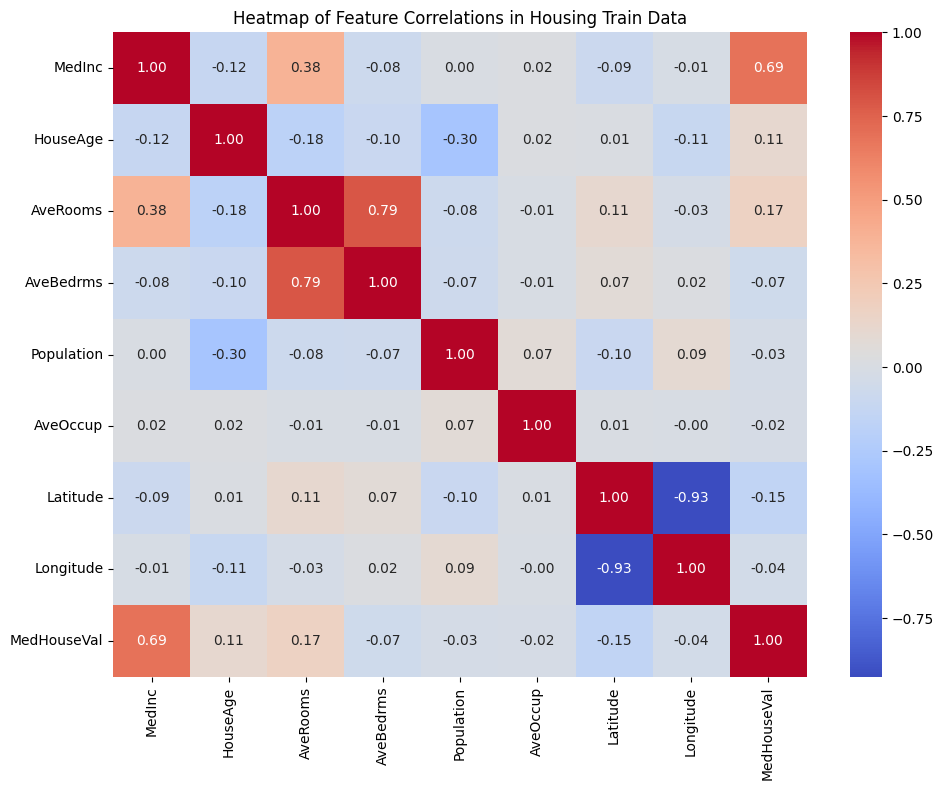

In [81]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_train.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap of Feature Correlations in Housing Train Data")
plt.tight_layout()
plt.show()

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np


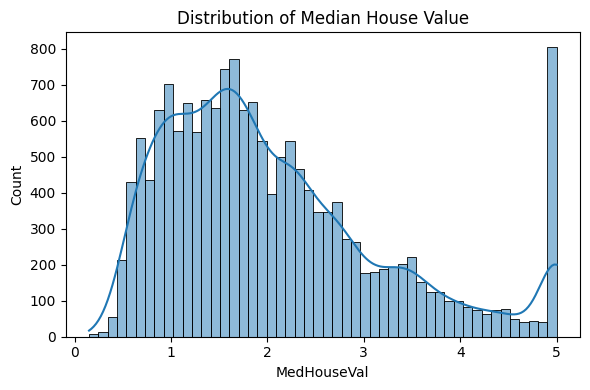

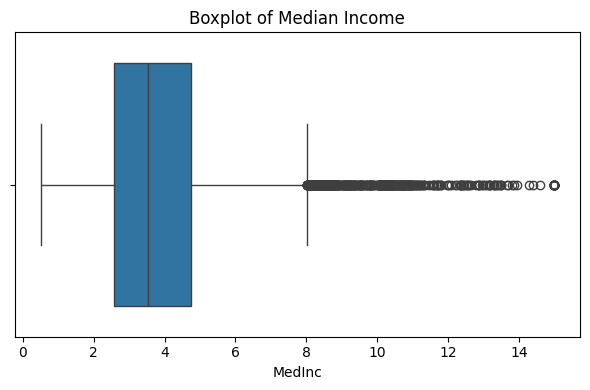

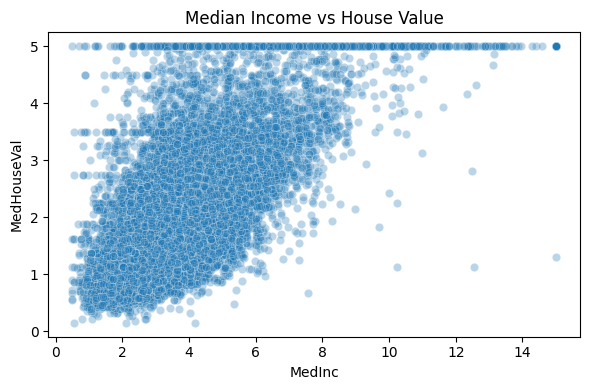

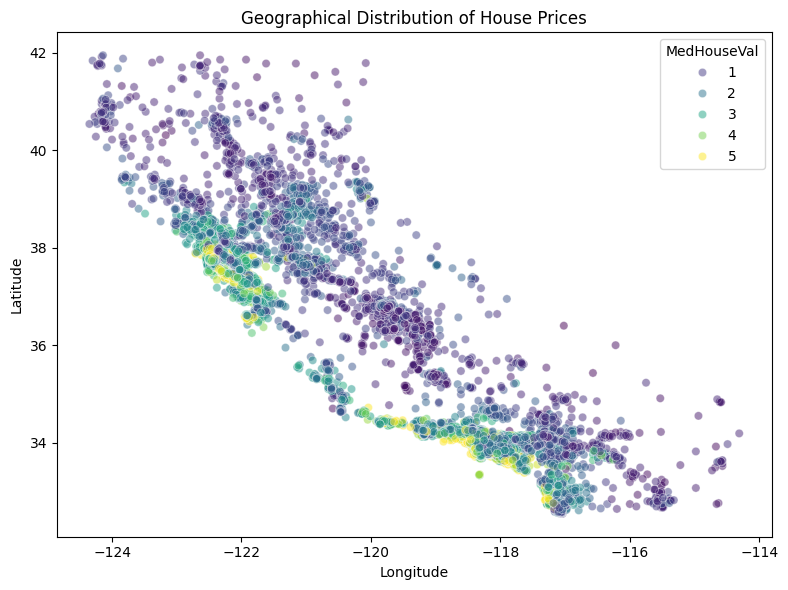

In [83]:
# Feature engineering
df_train["RoomPerBedroom"] = df_train["AveRooms"] / df_train["AveBedrms"]

# Outlier removal
df_train_filtered = df_train[df_train["AveOccup"] < 100]

# Plots (4 EDA visualizations)
# Histogram
plt.figure(figsize=(6, 4))
sns.histplot(df_train_filtered['MedHouseVal'], bins=50, kde=True)
plt.title("Distribution of Median House Value")
plt.tight_layout()
plt.show()

# להבין איך מתפלג המשתנה שאותו אנחנו מנסים לחזות (target).
# לבדוק אם ההתפלגות נורמלית, חד-שיאית, או מוטה (skewed).
# תובנה מהגרף:
# יש התפלגות עם שיאים – בעיקר סביב הערכים 2 ו־5.
# ייתכן שערך 5.0 הוא תקרה עליונה מלאכותית (cap), ולכן חשוב לטפל בזה או להכיר בזה במודל.

# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_train_filtered['MedInc'])
plt.title("Boxplot of Median Income")
plt.tight_layout()
plt.show()

# לבדוק את טווח הערכים של הכנסה.
# לזהות outliers (ערכים חריגים) שיכולים לעוות את המודל.
# תובנה מהגרף:
# יש ערכים חריגים גבוהים (outliers) שיכולים לדרוש נירמול או קיצוץ.
# רוב הנתונים מרוכזים בין ערכים נמוכים יחסית (מתחת ל־6).

# Scatterplot
plt.figure(figsize=(6, 4))
sns.scatterplot(x="MedInc", y="MedHouseVal", data=df_train_filtered, alpha=0.3)
plt.title("Median Income vs House Value")
plt.tight_layout()
plt.show()

# מטרה:
# לבדוק אם יש קשר בין הכנסה למחיר הבית.
# להבין אם ניתן להשתמש בקשר הזה במודל (קו לינארי? לוגי? עקום?)
# תובנה מהגרף:
# יש קשר חיובי ברור: ככל שהכנסה גבוהה יותר, כך גם מחיר הבית.
# תומך בשימוש ברגרסיה לינארית (לפחות כפיצ’ר משמעותי).

# Geo plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Longitude", y="Latitude", hue="MedHouseVal", data=df_train_filtered, palette="viridis", alpha=0.5)
plt.title("Geographical Distribution of House Prices")
plt.tight_layout()
plt.show()

# מטרה:
# לבדוק האם מיקום גאוגרפי משפיע על מחירי בתים.
# לאתר ריכוזים של מחירים גבוהים/נמוכים לפי אזור.
# תובנה מהגרף:
# קיימים אזורים מסוימים עם ריכוזים של מחירים גבוהים (כנראה ערים).
# שווה לשקול להשתמש במיקום (או קיבוץ מיקום) כמאפיין חשוב.

In [84]:
# Define: X and y
X = df_train.drop(columns=["MedHouseVal"])
y = df_train["MedHouseVal"]

# Split into train/validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalization of the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Regression Model Training
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Performance Forecasting and Evaluation
y_pred = model.predict(X_val_scaled)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")


RMSE: 0.735
R²: 0.612


## Part 3 - Experiments
You could add as many code cells as needed

### Feature Engineering והנדסת נתונים

בוצעה יצירת פיצ'ר חדש בשם `RoomPerBedroom` על ידי חישוב היחס בין `AveRooms` ל־`AveBedrms`.  
הפיצ'ר הנוסף נועד לשקף את יחס החדרים לאדם או לרוחב המגורים, יותר מאשר המספרים האבסולוטיים.

בוצע סינון של `df_train` לפי outliers (חריגים) והתקבלה הגרסה `df_train_filtered`.

---

### מודלים והשוואה

בוצעה הנדסת תכונות ונבדקו ערכים קיצוניים בעמודות שונות כמו `AveOccup`.  
הוזנו הנתונים כ־X ו־y, ולאחר מכן בוצע תהליך של Cross-Validation (כולל GridSearch) עבור כל המודלים.

השתמשתי ב־`GridSearchCV` על מנת לבצע חיפוש בין ערכים שונים של Hyperparameters ולבחון את השפעתם על הביצועים.

#### עבור המודל DecisionTreeRegressor:
- נבדק הפרמטר `max_depth` – כלומר כמה רמות של חוקים המודל יכול ללמוד, ככל שהוא עמוק יותר כך הפיצול מדויק אך ייתכן Overfitting.

#### עבור המודל KNeighborsRegressor:
- נבדק הפרמטר `n_neighbors` אשר קובע את מספר השכנים שהמודל משתמש בהם לחיזוי ערך המטרה.
- נבדק גם `min_samples_split` כפיצול נוסף בענף.

---

### הערכה

- כל המודלים הושוו בעזרת 5-fold Cross Validation.
- נמדד הערך `RMSE` (Root Mean Squared Error) עבור כל אחד מהמודלים.
- התוצאות הוצגו בטבלה, והשוואה בוצעה גם על ערכים שונים של היפר־פרמטרים לכל אלגוריתם.

כך נבחנו דרישות של לפחות שני אלגוריתמים שונים, עם לפחות שני ערכים שונים לכל אחד, ובדיקת השפעתם בפועל על הביצועים.


In [85]:
X = df_train_filtered.drop('MedHouseVal', axis=1)
y = df_train_filtered['MedHouseVal']

tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
scores = cross_val_score(tree_model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print("5-fold CV RMSE scores:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())

5-fold CV RMSE scores: [0.71237592 0.70609104 0.74347964 0.72008141 0.72096604]
Average RMSE: 0.7205988097125556


In [86]:

param_grid = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)
print("Best RMSE:", np.sqrt(-grid_search.best_score_))

Best parameters: {'max_depth': 10, 'min_samples_split': 10}
Best RMSE: 0.6610833853151464


In [87]:
lin_model = LinearRegression()
lin_scores = cross_val_score(lin_model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Linear Regression Average RMSE:", np.sqrt(-lin_scores.mean()))

Linear Regression Average RMSE: 0.7027798980896695


In [88]:
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_search_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, scoring='neg_mean_squared_error')
grid_search_knn.fit(X, y)
print("Best KNN params:", grid_search_knn.best_params_)
print("Best KNN RMSE:", np.sqrt(-grid_search_knn.best_score_))

Best KNN params: {'n_neighbors': 9}
Best KNN RMSE: 1.0688410879045407


In [89]:
knn_rmse = np.sqrt(-grid_search_knn.best_score_)
print("Best KNN RMSE:", knn_rmse)

Best KNN RMSE: 1.0688410879045407


In [90]:
results_df = pd.DataFrame([
    {
        "Model": "Linear Regression",
        "Best Params": "-",
        "Average RMSE": round(np.sqrt(-lin_scores.mean()), 4)
    },
    {
        "Model": "Decision Tree",
        "Best Params": str(grid_search.best_params_),
        "Average RMSE": round(np.sqrt(-grid_search.best_score_), 4)
    },
    {
        "Model": "KNN",
        "Best Params": str(grid_search_knn.best_params_),
        "Average RMSE": round(knn_rmse, 4)
    }
])

print(results_df)

               Model                                 Best Params  Average RMSE
0  Linear Regression                                           -        0.7028
1      Decision Tree  {'max_depth': 10, 'min_samples_split': 10}        0.6611
2                KNN                          {'n_neighbors': 9}        1.0688


In [91]:
# גרסה רגילה: יחס חדרים לחדרי שינה
df_train["RoomPerBedroom"] = df_train["AveRooms"] / df_train["AveBedrms"]

# גרסה שנייה: log של היחס
df_train["Log_RoomPerBedroom"] = np.log1p(df_train["RoomPerBedroom"])

# גרסה שלישית: יחס חדרים לאוכלוסייה
df_train["RoomsPerCapita"] = df_train["AveRooms"] / df_train["Population"]

לצורך בדיקת השפעת הנדסת תכונות, יצרתי שלוש גרסאות של הפיצ'ר:
1. יחס בין חדרים לחדרי שינה (RoomPerBedroom)
2. לוג של היחס (Log_RoomPerBedroom) – להקטנת השפעת outliers
3. יחס חדרים לנפש (RoomsPerCapita)

In [92]:
# לבחור תכונות עבור כל גרסה
features_sets = {
    "Basic": ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'],
    "With_RoomPerBedroom": ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'RoomPerBedroom'],
    "With_LogRoomPerBedroom": ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'Log_RoomPerBedroom'],
    "With_RoomsPerCapita": ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'RoomsPerCapita']
}


results = []
for name, features in features_sets.items():
    X = df_train[features]
    y = df_train["MedHouseVal"]
    scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-scores.mean())
    results.append({"Version": name, "RMSE": round(rmse, 4)})

# הצגת התוצאות בטבלה
results_df = pd.DataFrame(results)
print(results_df)


                  Version    RMSE
0                   Basic  0.7238
1     With_RoomPerBedroom  0.7188
2  With_LogRoomPerBedroom  0.7161
3     With_RoomsPerCapita  0.7245


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [93]:
X = df_train.drop('MedHouseVal', axis=1)
y = np.log1p(df_train['MedHouseVal'])  # אם אתה באמת רוצה לחזות את הלוג

# יחס בין חדרים לגיל בתים
X['rooms_per_house_age'] = X['AveRooms'] / (X['HouseAge'] + 1)

# פיצ'ר פולינומי של MedInc
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X[['MedInc']])
X['MedInc_squared'] = X_poly[:, 1]
X_train_columns = X.columns


In [94]:
# אימון המודל על כל הנתונים עם ההיפר-פרמטרים שנבחרו
model = DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=42)
model.fit(X, y)

DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=42)

In [95]:
# טען את קובץ הבדיקה
X_val = pd.read_csv('housing_test.csv')

# יצירת פיצ'רים כמו באימון
X_val['rooms_per_house_age'] = X_val['AveRooms'] / (X_val['HouseAge'] + 1)

# פיצ'ר RoomPerBedroom
X_val['RoomPerBedroom'] = X_val['AveRooms'] / X_val['AveBedrms']

# פיצ'ר Log_RoomPerBedroom
X_val['Log_RoomPerBedroom'] = np.log1p(X_val['RoomPerBedroom'])

# פיצ'ר RoomsPerCapita
X_val['RoomsPerCapita'] = X_val['AveRooms'] / X_val['Population']

# פיצ'ר פולינומי של MedInc (על אותו poly כמו באימון)
X_val_poly = poly.transform(X_val[['MedInc']])
X_val['MedInc_squared'] = X_val_poly[:, 1]

# יישור לסדר העמודות של האימון
X_val = X_val[X_train_columns]
print(X_val.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'RoomPerBedroom', 'Log_RoomPerBedroom',
       'RoomsPerCapita', 'rooms_per_house_age', 'MedInc_squared'],
      dtype='object')


In [96]:
print(X_val.isna().sum())
print(X_val.shape)
X_val = X_val.dropna()
y_val_true = pd.read_csv('housing_test.csv')['MedHouseVal']
y_val_true = y_val_true.loc[X_val.index]


MedInc                 0
HouseAge               0
AveRooms               0
AveBedrms              0
Population             0
AveOccup               0
Latitude               0
Longitude              0
RoomPerBedroom         0
Log_RoomPerBedroom     0
RoomsPerCapita         0
rooms_per_house_age    0
MedInc_squared         0
dtype: int64
(4128, 13)


In [97]:
# נניח שהשתמשת ב-df_test כדי לבנות את X_val
y_val_true = df_test['MedHouseVal']

# חיזוי
y_val_log_pred = model.predict(X_val)
y_val_pred = np.expm1(y_val_log_pred)

# מדדים
mse = mean_squared_error(y_val_true, y_val_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val_true, y_val_pred)

# הדפסה
print(f"RMSE על סט הבדיקה: {rmse:.2f}") #ככל שקטן יותר – טוב יותר
print(f"R² על סט הבדיקה: {r2:.3f}")



RMSE על סט הבדיקה: 0.63
R² על סט הבדיקה: 0.712


## Part 5 - Apply on test and show model performance estimation

In [98]:
df = pd.read_csv('housing_train.csv')

# split to train and validation
X = df.drop('MedHouseVal', axis=1)
y = np.log1p(df['MedHouseVal'])  # לוג של המטרה

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)# פיצול לקביעות

# הנדסת פיצ'רים עבור X_train
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train['rooms_per_house_age'] = X_train['AveRooms'] / (X_train['HouseAge'] + 1)
X_train_poly = poly.fit_transform(X_train[['MedInc']])
X_train['MedInc_squared'] = X_train_poly[:, 1]

# RoomPerBedroom
X_train['RoomPerBedroom'] = X_train['AveRooms'] / X_train['AveBedrms']
# Log_RoomPerBedroom
X_train['Log_RoomPerBedroom'] = np.log1p(X_train['RoomPerBedroom'])
# RoomsPerCapita
X_train['RoomsPerCapita'] = X_train['AveRooms'] / X_train['Population']


# שמירת רשימת הפיצ'רים
X_train_columns = X_train.columns

# אימון המודל
model = DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=42)
model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=42)

In [99]:
# יצירת פיצ'רים על X_val כמו על X_train
X_val['rooms_per_house_age'] = X_val['AveRooms'] / (X_val['HouseAge'] + 1)
X_val_poly = poly.transform(X_val[['MedInc']])
X_val['MedInc_squared'] = X_val_poly[:, 1]

X_val['RoomPerBedroom'] = X_val['AveRooms'] / X_val['AveBedrms']
X_val['Log_RoomPerBedroom'] = np.log1p(X_val['RoomPerBedroom'])
X_val['RoomsPerCapita'] = X_val['AveRooms'] / X_val['Population']

X_val = X_val[X_train_columns]

# R² -
# מסביר כמה מהמגוון (variance) בנתונים מוסבר ע"י המודל.
# 1=מושלם
# 0= לא מושלם

# RMSE -
# שורש ממוצע ריבועי הטעויות בין תחזית לערך האמיתי.
# ככל שיותר נמוך – טוב יותר.


#  תחזית
y_pred_val_log = model.predict(X_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val_log))
r2_val = r2_score(y_val, y_pred_val_log)

print(f"Validation RMSE (log scale): {rmse_val:.4f}")
print(f"Validation R²: {r2_val:.4f}")


Validation RMSE (log scale): 0.1915
Validation R²: 0.7198


In [100]:
# טען את סט הבדיקה
df_test = pd.read_csv('housing_test.csv')
X_test = df_test.drop('MedHouseVal', axis=1)
y_test_log = np.log1p(df_test['MedHouseVal']) # שימוש בלוג לאיזון התפלגות לא נורמלית

# יצירת פיצ'רים
X_test['rooms_per_house_age'] = X_test['AveRooms'] / (X_test['HouseAge'] + 1)
X_test_poly = poly.transform(X_test[['MedInc']])
X_test['MedInc_squared'] = X_test_poly[:, 1]

X_test['RoomPerBedroom'] = X_test['AveRooms'] / X_test['AveBedrms']
X_test['Log_RoomPerBedroom'] = np.log1p(X_test['RoomPerBedroom'])
X_test['RoomsPerCapita'] = X_test['AveRooms'] / X_test['Population']

X_test = X_test[X_train_columns]

# תחזית
y_pred_test_log = model.predict(X_test)
y_pred_test = np.expm1(y_pred_test_log)

# הדפסת 5 תחזיות ראשונות
print("\nFirst 5 predictions on test set:")
for i in range(5):
    print(f"דוגמה {i+1}: תחזית = {y_pred_test[i]:.2f}, ערך אמיתי = {df_test['MedHouseVal'].iloc[i]:.2f}")

# חישוב RMSE על test
rmse_test = np.sqrt(mean_squared_error(y_test_log, y_pred_test_log))
r2_test = r2_score(y_test_log, y_pred_test_log)

print(f"\nTest RMSE (log scale): {rmse_test:.4f}")
print(f"Test R²: {r2_test:.4f}")




First 5 predictions on test set:
דוגמה 1: תחזית = 2.99, ערך אמיתי = 3.85
דוגמה 2: תחזית = 2.48, ערך אמיתי = 2.46
דוגמה 3: תחזית = 3.09, ערך אמיתי = 2.01
דוגמה 4: תחזית = 1.20, ערך אמיתי = 1.05
דוגמה 5: תחזית = 1.40, ערך אמיתי = 1.08

Test RMSE (log scale): 0.1818
Test R²: 0.7398


In [101]:
# תחזית על X_val (עם פיצ'רים מותאמים מראש)
y_pred_val_log = model.predict(X_val)

# חישוב RMSE ו־R² על ערכי log
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val_log))
r2_val = r2_score(y_val, y_pred_val_log)

print("Validation Performance:")
print(f"RMSE (log scale): {rmse_val:.4f}")
print(f"R²: {r2_val:.4f}")


Validation Performance:
RMSE (log scale): 0.1915
R²: 0.7198


In [102]:
# תחזית על סט הבדיקה
y_pred_test_log = model.predict(X_test)

# חישוב RMSE ו־R² על ערכי log
rmse_test = np.sqrt(mean_squared_error(y_test_log, y_pred_test_log))
r2_test = r2_score(y_test_log, y_pred_test_log)

print("\nTest Set Performance:")
print(f"RMSE (log scale): {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")



Test Set Performance:
RMSE (log scale): 0.1818
R²: 0.7398
